#Map_and_Block library

In [ ]:
import numpy as np
import copy

We declare `Block` class, whose objects are blocks of the game.<br>
A block is defined by its *coordinate*, *direction* (either **vertical** or **horizontal**), *length* (either **2** or **3**).<br>
Also, a function `move` is defined to help the block move in the map


In [ ]:
class Block:
    """
    x range from 0 to 5
    y range from 0 to 5
    """ 
    def __init__(self, x, y, direction, length):
        global index
        self.start_point_x = x
        self.start_point_y = y
        self.direction = direction
        self.length = length
        self.indx = index
        index += 1          #when you initialize next item, its index will raise
        
    def __str__(self):
        a = 'start_point_x = %d\
        start_point_y = %d\
        direction = %s\
        length = %d\
        index  = %d'\
            % (int(self.start_point_x),\
            int(self.start_point_y),\
            self.direction,\
            int(self.length),\
            int(self.indx))
        return a

    def move(self, step, direct):
        """
        :param step: int
        :param direct: -1/+1
        :return: new block
        """
        if self.direction == "h":
            self.start_point_x += step * direct
        if self.direction == "v":
            self.start_point_y += step * direct

Now, `Map` class, represented by a numpy **6x6 matrix** <br>
Some basic functions for `Map` class:
- `add_block`: add an object from class `Block` to our map
- `possible_move`: declare **every** possible move of **every** block in the map

In [ ]:
class Map:
    def __init__(self):
        self.map = np.array([[0 for i in range(6)] for i in range(6)])

    def __str__(self):
        return str(self.map)

    def add_block(self, blk):
        x, y, direction, length, index = (
            blk.start_point_x,
            blk.start_point_y,
            blk.direction,
            blk.length,
            blk.indx,
        )
        if direction == "h":
            for i in range(length):
                self.map[y][x + i] = index
        if direction == "v":
            for i in range(length):
                self.map[y + i][x] = index
        
    def possible_move(self, blk):
        x, y, direction, length, index = (
            blk.start_point_x,
            blk.start_point_y,
            blk.direction,
            blk.length,
            blk.indx
        )
        move_list = []
        if direction == "v":
            if y == 0:
                up = 0
            else:
                for up in range(1, y + 1):
                    if self.map[y - up][x] != 0:
                        up -= 1
                        break
                    else:
                        move_list.append((up, -1, index))    
                        
            if y + length == 6:
                down = 0
            else:
                for down in range(1, 7 - y - length):
                    if self.map[y + length + down - 1][x] != 0:
                        down -= 1
                        break
                    else:
                        move_list.append((down, +1, index))

        if direction == "h":
            if x == 0:
                left = 0
            else:
                for left in range(1, x + 1):
                    if self.map[y][x - left] != 0:
                        left -= 1
                        break
                    else:
                        move_list.append((left, -1, index))
            if x + length == 6:
                right = 0
            else:
                for right in range(1, 7 - x - length):
                    if self.map[y][x + length + right - 1] != 0:
                        right -= 1
                        break
                    else:
                        move_list.append((right, +1, index))
        return move_list

Finally, `State` class, the **core of the searching algorithms**. A state contains the map and all its blocks.<br>
Its functions are:
- `GetMap` returns the map itself for future functions and then `Display` prints the map
-`GetNextMoves` returns the list of possible moves, calculated in `possible_move` function above
-`NextStates` with parameter **move** from `GetNextMove`, returns the class `State` of the map obtained **after the move**

In [ ]:
class State():
    def __init__(self, AllBlocks):
        self.AllBlocks = AllBlocks
        self.GameMap = Map()
        for block in self.AllBlocks:
            self.GameMap.add_block(block)  
    def GetMap(self):
        return self.GameMap
    
    def GetNextMoves(self):
        All_Moves_list = []
        a = self.GetMap()
        for blk in self.AllBlocks:
            All_Moves_list += a.possible_move(blk)
        return All_Moves_list

    def Display(self):
        return self.GameMap.__str__()
    
    def NextStates(self, move):
        New = []
        for block in self.AllBlocks:
            TempBlock = copy.copy(block)
            if TempBlock.indx == move[2]:
                TempBlock.move(move[1], move[0])
            New.append(TempBlock)
        return State(New)

Function `read_input` helps initializing the files *inp(x).txt* where x is the number of input set

In [ ]:
def read_input(file_name): # read a text file and return an instance of Map class
    m = Map()
    AllBlocks = []
    with open(file_name) as f:
        list_of_blocks = f.readlines()[:]
        number_of_blocks = len(list_of_blocks)
        for i in range(number_of_blocks):
            if i == number_of_blocks-1:
                block = list_of_blocks[i].strip()
            else:
                block = list_of_blocks[i][:-1].strip()
            x = int(block[0])
            y = int(block[2])
            direc = block[4]
            length = int(block[-1])
            blk = Block(x, y, direc, length)
            AllBlocks.append(blk)
            m.add_block(blk)
    return m, AllBlocks


The map is displayed as below

In [ ]:
index = 1
MapTag = '55'
to_solve = read_input('/content/testcases/inp%s.txt' % MapTag) 
print (to_solve[0])

[[ 0  9  9  9  5  4]
 [ 7  7  6  6  5  4]
 [ 3  1 11 11  5  4]
 [ 3  1  0  2  0  0]
 [ 3  0  0  2  8  8]
 [ 0  0  0 10 10 10]]


For reference and comparison, we've also included images of the map

This is the image of the map


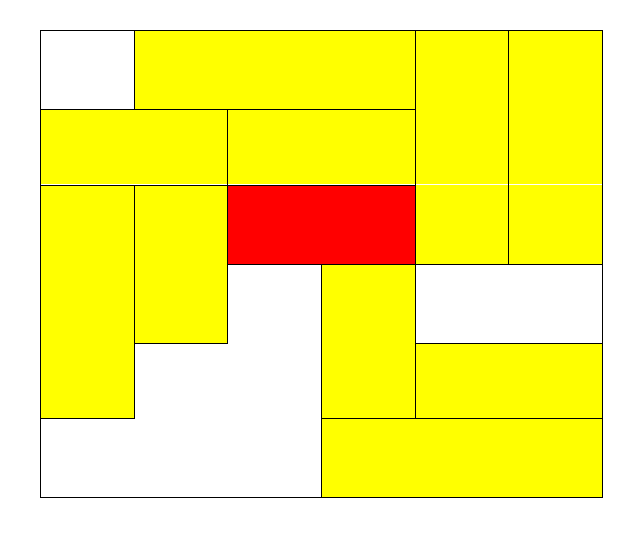

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/testcases/map%s.PNG' % MapTag)
print ('This is the image of the map')
cv2_imshow(img)

Classification of maps:
- 1-7: Unsolvable instances
- 8-10: Already goal state

*Please note that the above map instances are only used to test Breadth-first search*<br>
Our tests mainly focus on the following maps:
- 11-30: Simple test cases (which are requiring less than 6 moves to solve)
- 31-45: Hard test cases, in terms of looking for a move towards the solution. Their optimal solutions requires about 15 to 25 steps
- 46-55: These test cases were generated by generator. We'll put it in the appendix.

#Uninformed search

##Breadth-first search

Firstly, we define some functions that could help us perform Breadth- first search:
- `Goal_state` function returns True **whenever the prison block can escape**.
- `SuccGen` returns the nodes opened by **current state**, also it eliminates repeated nodes by using `AdjacentStates` dictionary.
- `Trace` helps returning step-by-step solution with a list named `path`.
- And finally `BFS` does breadth-first search.


In [ ]:
def Goal_state(node):
    start = node.AllBlocks[-1].start_point_x
    if sum(node.GameMap.map[2, start: 6]) == node.AllBlocks[-1].indx * node.AllBlocks[-1].length:
        return True
    return False

def SuccGen(CurrState): 
    ChildLst = []
    for move in CurrState.GetNextMoves():
        NextState = CurrState.NextStates(move)
        if NextState.GameMap.__str__() not in AdjacentStates:
            AdjacentStates[NextState.GameMap.__str__()] = CurrState.GameMap.__str__()
            ChildLst.append(NextState)    
    return ChildLst

def Trace():
    CurrPos = FinishNode
    while CurrPos != InitState.GameMap.__str__():
        path.append(CurrPos)
        CurrPos = AdjacentStates[CurrPos]
        
def BFS(root):
    if Goal_state(root):
      return 'Already goal'
    else:
      Queue = SuccGen(root)
      while len(Queue) != 0:
          CurrNode = Queue.pop(0)
          if Goal_state(CurrNode):
              return CurrNode.GameMap.__str__()
          else:
              for ChildNode in SuccGen(CurrNode):
                  Queue.append(ChildNode)
      return 'Failure'

### Map solver<br>
Here we perform Breadth-first search on our game map.

In [ ]:
index = 1
MapTag = '30'
to_solve = read_input('/content/testcases/inp%s.txt' % MapTag) 

In [ ]:
index = 1
All_Blocks = to_solve[1]
InitState = State(All_Blocks)



AdjacentStates = dict()
path = []
print(InitState.GameMap)
FinishNode = BFS(InitState)

if FinishNode == 'Already goal':
  print('Goal reached already')

elif FinishNode != 'Failure':
    Trace()

    print('Number of steps: %d' %(len(path)))

    for i in range(len(path) -1, -1, -1):
        print('Step %d' % (len(path) - i))
        print(path[i])
        print()
else:
    print('We have been stucked! No ways to escape!')


[[ 1  1  1  2  0  0]
 [ 3  0  0  2  4  4]
 [ 3  0 11 11  5  6]
 [ 0  0  0  0  5  6]
 [ 0  0  0  0  7  8]
 [ 9  9 10 10  7  8]]
Number of steps: 5
Step 1
[[ 1  1  1  2  0  0]
 [ 3  0  0  2  4  4]
 [ 3 11 11  0  5  6]
 [ 0  0  0  0  5  6]
 [ 0  0  0  0  7  8]
 [ 9  9 10 10  7  8]]

Step 2
[[ 1  1  1  0  0  0]
 [ 3  0  0  0  4  4]
 [ 3 11 11  0  5  6]
 [ 0  0  0  2  5  6]
 [ 0  0  0  2  7  8]
 [ 9  9 10 10  7  8]]

Step 3
[[ 1  1  1  0  0  0]
 [ 3  0  4  4  0  0]
 [ 3 11 11  0  5  6]
 [ 0  0  0  2  5  6]
 [ 0  0  0  2  7  8]
 [ 9  9 10 10  7  8]]

Step 4
[[ 1  1  1  0  5  0]
 [ 3  0  4  4  5  0]
 [ 3 11 11  0  0  6]
 [ 0  0  0  2  0  6]
 [ 0  0  0  2  7  8]
 [ 9  9 10 10  7  8]]

Step 5
[[ 1  1  1  0  5  6]
 [ 3  0  4  4  5  6]
 [ 3 11 11  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  2  7  8]
 [ 9  9 10 10  7  8]]



### Testcases - Analysis

Here's some analysis of the testcases.<br> Note that map 1-7 are unsolvable testcases and 8-10 are at their goal states already, so we skipped them.


In [ ]:
import time
for map_index in range (11,56):

    index = 1
    to_solve = read_input('/content/testcases/inp%02i.txt' % map_index)
    All_Blocks = to_solve[1]
    InitState = State(All_Blocks)
    AdjacentStates = dict()
    path = []

    start = time.time()

    FinishNode = BFS(InitState)
    Trace()

    end = time.time()
    
    print('Map: %i  Number of steps: %02d  Fringe nodes: %05d  Time: %s sec' %(map_index, len(path), len(AdjacentStates), '{:.5f}'.format(end-start)))

Map: 11  Number of steps: 02  Fringe nodes: 00052  Time: 0.04309 sec
Map: 12  Number of steps: 02  Fringe nodes: 00278  Time: 0.20453 sec
Map: 13  Number of steps: 02  Fringe nodes: 00343  Time: 0.30776 sec
Map: 14  Number of steps: 02  Fringe nodes: 00166  Time: 0.14229 sec
Map: 15  Number of steps: 02  Fringe nodes: 00079  Time: 0.04828 sec
Map: 16  Number of steps: 04  Fringe nodes: 00414  Time: 0.59557 sec
Map: 17  Number of steps: 04  Fringe nodes: 00242  Time: 0.37676 sec
Map: 18  Number of steps: 04  Fringe nodes: 00041  Time: 0.04293 sec
Map: 19  Number of steps: 04  Fringe nodes: 00124  Time: 0.13628 sec
Map: 20  Number of steps: 04  Fringe nodes: 00038  Time: 0.07951 sec
Map: 21  Number of steps: 04  Fringe nodes: 01955  Time: 2.95395 sec
Map: 22  Number of steps: 04  Fringe nodes: 00402  Time: 0.73781 sec
Map: 23  Number of steps: 04  Fringe nodes: 01261  Time: 1.89931 sec
Map: 24  Number of steps: 04  Fringe nodes: 00060  Time: 0.05832 sec
Map: 25  Number of steps: 04  Frin

As observed above, most of the time, we obtain quite a acceptable runtime, *except for map 44*

##Iterative Deepening search

###Not deleting repetitive nodes: Map solver (for map 11 to 30)

Here we define some functions, some are previously defined in the Breadth-first search section.<br>
- `DLS` perform recursive depth-limited search for the node.<br>
- Then `IDS` increases the maximum depth of `DLS` until we find the solution.<br>

**Note**: because of high number of recursive call, we only consider 

In [ ]:
def Goal_state(node):
    start = node.AllBlocks[-1].start_point_x
    if sum(node.GameMap.map[2, start: 6]) == All_Blocks[-1].indx * All_Blocks[-1].length:
        return True
    return False

def SuccGen_dfs(CurrState): 
    ChildLst_dfs = []
    for move in CurrState.GetNextMoves():
        NextState = CurrState.NextStates(move)
        ChildLst_dfs.append(NextState)    
    return ChildLst_dfs
    
def DLS(root, max_level):
    path_ids.append(root.GameMap.__str__())
    if Goal_state(root):
        return path_ids
    if len(path_ids) == max_level:
        return False
    for ChildNode in SuccGen_dfs(root):
        if DLS(ChildNode, max_level):
            return path_ids
        path_ids.pop()
    return False

def IDS(root, depth = 1):
    global path_ids
    while not DLS (root, depth):
        depth+= 1
        path_ids = []


In [ ]:
index = 1
MapTag = '28'
to_solve = read_input('/content/testcases/inp%s.txt' % MapTag) 

In [ ]:
path_ids = []
index = 1

All_Blocks = to_solve[1]
InitState = State(All_Blocks)
start = time.time()
print(InitState.GameMap)
IDS(InitState)
print ('Number of steps:',len(path_ids)-1)
for step in range(1, len (path_ids)):
    print()
    print('Step',step)
    print(path_ids[step])
end = time.time()
print ('Map:', MapTag, 'runtime:', '{:.5f}'.format(end-start))

###Not deleting repetitive nodes: Analysis(for map 11 to 30)<br>

In [ ]:
import time
for MapTag in range (11,31):
    path_ids = []
    index = 1
    to_solve = read_input('/content/testcases/inp%s.txt' % MapTag) 
    All_Blocks = to_solve[1]
    InitState = State(All_Blocks)
    start = time.time()
    IDS(InitState)
    end = time.time()
    print ('Map:', MapTag, '     steps:', len(path_ids)-1, '     time:', '{:.5f}'.format(end-start), 'sec')

###Deleting repetitive nodes: Map solver

Firstly, we define some functions that could help us perform Iterative deepening search:
- Once again, `goal_state` function returns True **whenever the prison block can escape**.
- `depth_limited_search` performs depth-first-search with limited depth and returning step-by-step solution with a list named `solution` when it finds the goal state.
- `iterative_deepening_search` performs `depth_limited_search` with increasing depth limit starting from 0 till it finds the goal state.
- `print_result` calls the `iterative_deepening_search` and print the solution to users, makes it easier to use.<br>

**Note:** `iterative_deepening_search` can't check whether the solution exists or not also the function only expands unvisited nodes so that it can save a lot of time but can't find the optimal solution.



In [ ]:
def goal_state(node):
    start = node.AllBlocks[-1].start_point_x
    if sum(node.GameMap.map[2, start: 6]) == node.AllBlocks[-1].indx * node.AllBlocks[-1].length:
        return True
    return False

def depth_limited_search(m, max_depth, current_depth):
    if current_depth >= max_depth: return #if the current depth >= the depth we set then return(stop)
    global solution 
    global check
    global visited
    global count
    if check: return #if found the solution then return(stop)
    visited.add(m.GameMap.__str__()) #add this board so we don't encounter it again
    boards = [m]
    for board in boards:
        #make a list of possible moves
        for move in m.GetNextMoves():
            d = m.NextStates(move)
            # print(move)
            if d.GameMap.__str__() not in visited:
                visited.add(d.GameMap.__str__()) #add this board so we don't encounter it again
                steps[current_depth].append((board.GameMap.__str__(), d.GameMap.__str__())) #save the board for tracking back
                if goal_state(d): #if solution found 
                    check = 1
                    count += 1
                    if count == 1:
                        solution.append(d.GameMap.__str__())
                        solution.append(board.GameMap.__str__())
                        temp = board.GameMap.__str__()
                        k = len(steps)
                        while k > 0: # tracking back
                            for board_step in steps[k - 1]:
                                if temp == board_step[1]:
                                    solution.append(board_step[0])
                                    index = steps[k - 1].index(board_step)
                                    temp = board_step[0]
                            k -= 1                                
                        return
                depth_limited_search(d, max_depth, current_depth + 1) # solution not found, call the function with this map
    
def iterative_deepening_search(m):
    i = 0
    global steps
    global visited
    global check
    global solution
    global count
    solution = []
    check = 0
    count = 0
    while not check:
        # print('max_depth', i)
        visited = set()
        check = 0
        steps = [[] for j in range(i)]
        str_steps = [[] for j in range(i)]
        depth_limited_search(m, i, 0)
        i += 1
        
def print_result(m):
    global solution
    start = time.time()
    iterative_deepening_search(m)
    initial_board = solution.pop()
    solution = solution[::-1]
    run_time = time.time() - start

In [ ]:
index = 1
MapTag = '11'
to_solve = read_input('/content/testcases/inp%s.txt' % MapTag) 

In [ ]:
import time
AllBlocks = to_solve[1]
InitState = State(AllBlocks)
print(InitState.GameMap)

start = time.time()
print_result(InitState)
end = time.time()

for step in range(len(solution)):
    print()
    print ('Step ', step+1)
    print(solution[step])
print('\nMap:',MapTag, ' time:','{:.5f}'.format(end-start))

###Deleting repetitive nodes: Analysis


In [ ]:
for MapTag in range (11, 31):
    global index
    index = 1
    to_solve = read_input('/content/testcases/inp%i.txt' % MapTag)
    All_Blocks = to_solve[1]
    InitState = State(All_Blocks)\

    start = time.time()
    print_result(InitState)
    end = time.time()
    print('Map: %i   Steps: %02d   Number of nodes: %05d   Time: %s sec' %(MapTag, len(solution), len(visited), '{:.5f}'.format(end-start)))

Map: 11   Steps: 02   Number of nodes: 00016   Time: 0.02150 sec
Map: 12   Steps: 02   Number of nodes: 00031   Time: 0.02493 sec
Map: 13   Steps: 02   Number of nodes: 00065   Time: 0.04944 sec
Map: 14   Steps: 02   Number of nodes: 00028   Time: 0.02257 sec
Map: 15   Steps: 02   Number of nodes: 00014   Time: 0.01422 sec
Map: 16   Steps: 04   Number of nodes: 00044   Time: 0.19574 sec
Map: 17   Steps: 04   Number of nodes: 00100   Time: 0.13338 sec
Map: 18   Steps: 05   Number of nodes: 00021   Time: 0.05385 sec
Map: 19   Steps: 08   Number of nodes: 00026   Time: 0.24998 sec
Map: 20   Steps: 11   Number of nodes: 00036   Time: 0.23879 sec
Map: 21   Steps: 05   Number of nodes: 00574   Time: 0.96788 sec
Map: 22   Steps: 05   Number of nodes: 00141   Time: 0.27640 sec
Map: 23   Steps: 06   Number of nodes: 00335   Time: 0.71971 sec
Map: 24   Steps: 06   Number of nodes: 00026   Time: 0.06863 sec
Map: 25   Steps: 04   Number of nodes: 00015   Time: 0.01956 sec
Map: 26   Steps: 06   Num

# Informed search


In this part, we use the structure of priority queue to derive the nodes with the best heuristic.<br>
Thus, some classes need adjustment.<br>
For example, class `State` now include the evaluation function **f(state)=g(state)+h(state)**<br>
The priority queue structure is implemented in class `PriorityQueue`

In [ ]:
import numpy as np
import copy

class Block:
    index = 0
    """
    x range from 0 to 5
    y range from 0 to 5
    """ 
    def __init__(self, x, y, direction, length):
        global index
        self.start_point_x = x
        self.start_point_y = y
        self.direction = direction
        self.length = length
        Block.index += 1  #when you initialize next item, its index will raise
        self.indx = Block.index
                 
        
    def __str__(self):
        a = 'start_point_x = %d\
        start_point_y = %d\
        direction = %s\
        length = %d\
        index  = %d'\
            % (int(self.start_point_x),\
            int(self.start_point_y),\
            self.direction,\
            int(self.length),\
            int(self.indx))
        return a

    def move(self, step, direct):
        """
        :param step: int
        :param direct: -1/+1
        :return: new block
        """
        if self.direction == "h":
            self.start_point_x += step * direct
        if self.direction == "v":
            self.start_point_y += step * direct
            
    def restartTag():
        Block.index = 0
    def __eq__(self, other):
        return self.start_point_x == other.start_point_x and self.start_point_y == other.start_point_y

class State():
    def __init__(self, AllBlocks, InitCost = 0, Func = None):
        self.AllBlocks = AllBlocks
        self.GameMap = Map()
        for block in self.AllBlocks:
            self.GameMap.add_block(block)
        self.InitCost = InitCost
        self.Eval = None
        self.Func = Func
        self.GetEvaluation()

        Block.restartTag()
        
    def __lt__(self, other):
        return self.Eval < other.Eval
    def __gt__(self, other):
        return self.Eval > other.Eval
    def __eq__(self, other):    
        return self.Eval == other.Eval
    
    def GetEvaluation(self):
        if self.Func != None:
            self.Eval = self.InitCost + self.Func(self)
        else: 
            self.Eval = self.InitCost 
        
    def GetMap(self):
        return self.GameMap
    
    def GetNextMoves(self):
        All_Moves_list = []
        a = self.GetMap()
        for blk in self.AllBlocks:
            All_Moves_list += a.possible_move(blk)
        return All_Moves_list

    def Display(self):
        return self.GameMap.__str__()
    
    def NextState(self, move):
        New = []
        for block in self.AllBlocks:
            TempBlock = copy.copy(block)
            if TempBlock.indx == move[2]:
                TempBlock.move(move[0], move[1])
            New.append(TempBlock)
        return State(New, self.InitCost + 1 , self.Func)

class PriorityQueue():
    def __init__(self, Lst):
        self.Lst = Lst
        if self.GetSize() > 1:
            self.BuildHeap()
    
    def __str__(self):
        return str(self.Lst)

    def GetSize(self):
        return len(self.Lst)
    
    def BuildHeap(self):
        for i in range((self.GetSize() // 2) - 1, -1):
            self.Heapify(i)
            
    def Swap(self, i, j):
        self.Lst[i], self.Lst[j] = self.Lst[j], self.Lst[i]
        
    def Heapify(self, i):
        l = i * 2 + 1
        r = i * 2 + 2
        MinId = i
        if r <= self.GetSize() - 1:
            if self.Lst[MinId] > self.Lst[r]:
                MinId = r
            
        if l <= self.GetSize() - 1:
            if self.Lst[MinId] > self.Lst[l]:
                MinId = l
                
        if MinId != i:
            self.Swap(i, MinId)
            self.Heapify(MinId)

    def RevHeapify(self, i):
        parent = i // 2
        if parent != i and self.Lst[parent] > self.Lst[i]:
            self.Swap(parent, i)
            self.RevHeapify(parent)
            
    def Minimum(self):
        if self.GetSize != 0:
            return self.Lst[0]
        else:
            return float('inf')
            
    def Enqueue(self, a):
        self.Lst.append(a)
        self.RevHeapify(self.GetSize() - 1)
        
    def Dequeue(self):
        self.Swap(0, self.GetSize() - 1)
        Max = self.Lst.pop()
        self.Heapify(0)
        return Max    

##Heuristic functions

###Heuristic 1<br>
We call this heuristic 'blockage' heuristic. This heuristic is the one that most people who try to solve the board must have thought of.<br> It is based on the condition that vertical blocks should not block the way to the escape.<br>


This is the explanation of Heuristic 1


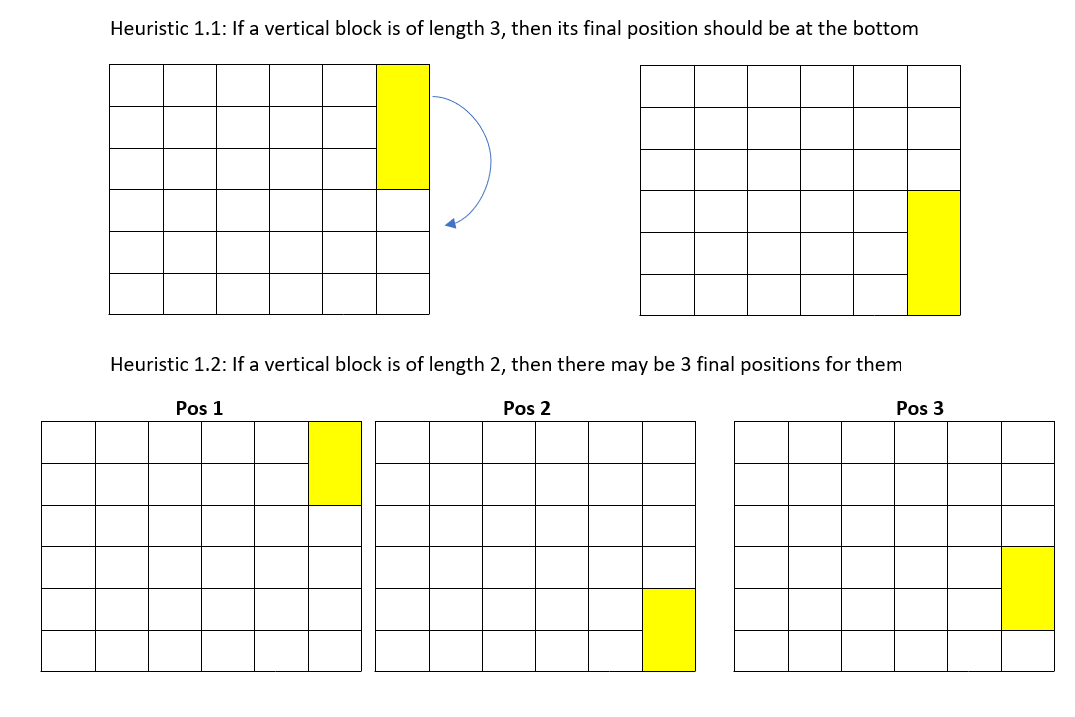

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/heuristic/heu1.PNG')
print ('This is the explanation of Heuristic 1')
cv2_imshow(img)

Here's the implementation of Heuristic 1

In [ ]:
def Heuristics1(State):
    count = 0
    for block in State.AllBlocks:
        if block.length == 3:
            if block.direction == 'v':
                if block.start_point_y != 3:
                    count += 1 
        else:
            if block.direction == 'v':
                if block.start_point_y != 0 or block.start_point_y != 4 or block.start_point_y != 3:
                    count += 1
    return count

###Heuristic 2<br>
This heuristic is calculated based on the difference between the number of nodes from current state to goal state.<br>
The goal state is generated from the result of breadth first search

This is the explanation of Heuristic 2


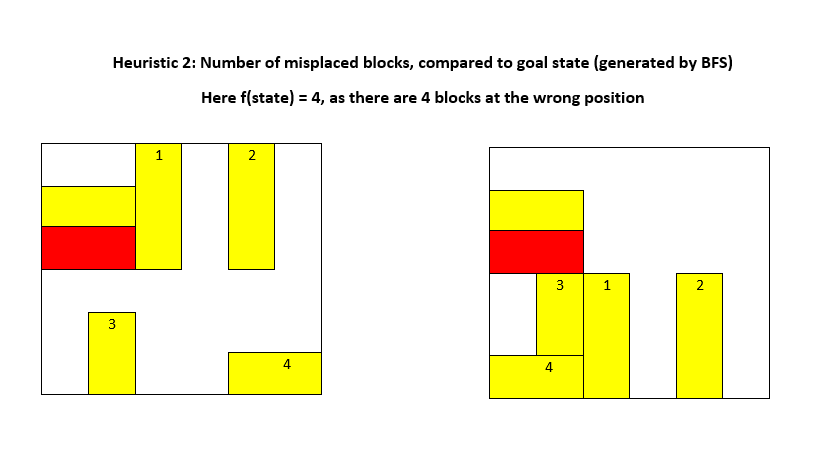

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/heuristic/heu2.PNG')
print ('This is the explanation of Heuristic 2')
cv2_imshow(img)

Here's the implementation of Heuristic 2

In [ ]:
def Heuristics2(State):
    global FinishAllBlocks
    count = 0
    for i in range(len(State.AllBlocks)):
        if not (State.AllBlocks[i] == FinishAllBlocks[i]):
            count += 1
    return count

###Heuristic 3<br>
This heuristic is calculated based on the Manhattan distance between the number of nodes from current state to goal state.<br>
The goal state is also generated from the result of breadth first search.

This is the explanation of Heuristic 3


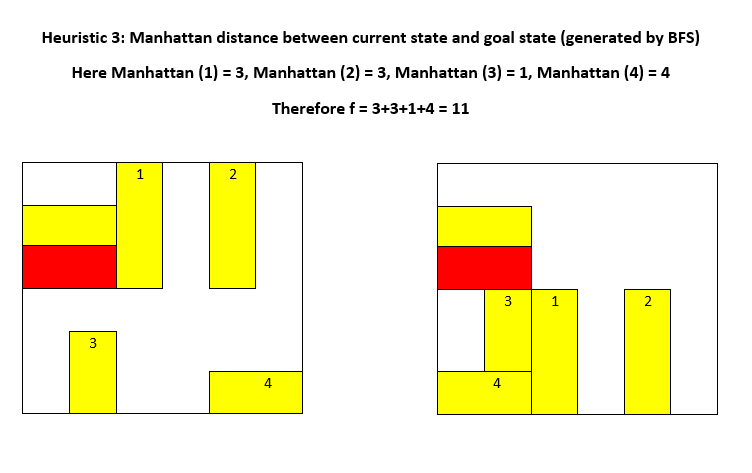

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/heuristic/heu3.PNG')
print ('This is the explanation of Heuristic 3')
cv2_imshow(img)

Here's the implementation of Heuristic 3

In [ ]:
def Heuristics3(State):
    global FinishAllBlocks
    sum = 0
    for i in range(len(State.AllBlocks)):
        sum += abs(State.AllBlocks[i].start_point_x - FinishAllBlocks[i].start_point_x)
        sum += abs(State.AllBlocks[i].start_point_y - FinishAllBlocks[i].start_point_y)
    return sum

## A* search

Here we re-implement some functions to fit with the priority queue structure mentioned above

In [ ]:
AdjacentStates = {}
def Goal(node):
    start = node.AllBlocks[-1].start_point_x
    if sum(node.GameMap.map[2, start: 6]) == InitState.AllBlocks[-1].indx * InitState.AllBlocks[-1].length:
        return True
    return False

def SuccGen(CurrState, PriQueue): 
    for move in CurrState.GetNextMoves():
        NextState = CurrState.NextState(move)
        if NextState.GameMap.__str__() not in AdjacentStates:
            AdjacentStates[NextState.GameMap.__str__()] = CurrState.GameMap.__str__()
            PriQueue.Enqueue(NextState)

def Trace():
    CurrPos = FinishNode
    while CurrPos != InitState.GameMap.__str__():
        path.append(CurrPos)
        CurrPos = AdjacentStates[CurrPos]

def A_star_search(root):
    global Success
    PriQueue = PriorityQueue([])
    SuccGen(root, PriQueue)
    while PriQueue.GetSize() != 0:
        CurrNode = PriQueue.Dequeue()
        
        if Goal(CurrNode) == True:
            return CurrNode
        else:
            SuccGen(CurrNode, PriQueue)
    Success = False

def Trace():
    global path
    CurrPos = FinishNode.GameMap.__str__()
    while CurrPos != InitState.GameMap.__str__():
        path.append(CurrPos)
        CurrPos = AdjacentStates[CurrPos]

###A* search: solver

####A* search: solver - Heuristic 1

In [ ]:
Tag = 40
_, All_Blocks = read_input('/content/testcases/inp%d.txt' % Tag)
_, FinishAllBlocks = read_input('/content/testcases/inp%d_2.txt' % Tag)

In [ ]:
Func = Heuristics1

In [ ]:
InitState = State(All_Blocks, 0, Func)
print(InitState.GameMap)
start = time.time()
path = []
AdjacentStates = {}
FinishNode = A_star_search(InitState)

Trace()
print('Number of steps: %d' %(len(path)))

for i in range(len(path) -1, -1, -1):
    print('Step %d' % (len(path) - i))
    print(path[i])
    print()

stop = time.time()
print('Time: ', stop - start) 
print('Nodes: ',len(AdjacentStates))

[[ 0  1  2  2  2  3]
 [ 0  1  4  0  5  3]
 [12 12  4  6  5  7]
 [ 8  8  8  6  0  7]
 [ 9  0  0 10 10 10]
 [ 9 11 11  0  0  0]]
Number of steps: 17
Step 1
[[ 0  1  2  2  2  3]
 [ 0  1  4  0  5  3]
 [12 12  4  6  5  7]
 [ 8  8  8  6  0  7]
 [ 9 10 10 10  0  0]
 [ 9 11 11  0  0  0]]

Step 2
[[ 0  1  2  2  2  3]
 [ 0  1  4  0  5  3]
 [12 12  4  6  5  0]
 [ 8  8  8  6  0  0]
 [ 9 10 10 10  0  7]
 [ 9 11 11  0  0  7]]

Step 3
[[ 0  1  2  2  2  0]
 [ 0  1  4  0  5  3]
 [12 12  4  6  5  3]
 [ 8  8  8  6  0  0]
 [ 9 10 10 10  0  7]
 [ 9 11 11  0  0  7]]

Step 4
[[ 0  1  0  2  2  2]
 [ 0  1  4  0  5  3]
 [12 12  4  6  5  3]
 [ 8  8  8  6  0  0]
 [ 9 10 10 10  0  7]
 [ 9 11 11  0  0  7]]

Step 5
[[ 0  1  4  2  2  2]
 [ 0  1  4  0  5  3]
 [12 12  0  6  5  3]
 [ 8  8  8  6  0  0]
 [ 9 10 10 10  0  7]
 [ 9 11 11  0  0  7]]

Step 6
[[ 0  1  4  2  2  2]
 [ 0  1  4  6  5  3]
 [12 12  0  6  5  3]
 [ 8  8  8  0  0  0]
 [ 9 10 10 10  0  7]
 [ 9 11 11  0  0  7]]

Step 7
[[ 0  1  4  2  2  2]
 [ 0  1  4  6  

####A* search: solver - Heuristic 2

In [ ]:
Func = Heuristics2

In [ ]:
InitState = State(All_Blocks, 0, Func)
print(InitState.GameMap)
start = time.time()
path = []
AdjacentStates = {}
FinishNode = A_star_search(InitState)

Trace()
print('Number of steps: %d' %(len(path)))

for i in range(len(path) -1, -1, -1):
    print('Step %d' % (len(path) - i))
    print(path[i])
    print()

stop = time.time()
print('Time: ', stop - start) 
print('Nodes: ',len(AdjacentStates))

[[ 0  1  2  2  2  3]
 [ 0  1  4  0  5  3]
 [12 12  4  6  5  7]
 [ 8  8  8  6  0  7]
 [ 9  0  0 10 10 10]
 [ 9 11 11  0  0  0]]
Number of steps: 17
Step 1
[[ 0  1  2  2  2  3]
 [ 0  1  4  0  5  3]
 [12 12  4  6  5  7]
 [ 8  8  8  6  0  7]
 [ 9 10 10 10  0  0]
 [ 9 11 11  0  0  0]]

Step 2
[[ 0  1  2  2  2  3]
 [ 0  1  4  0  5  3]
 [12 12  4  6  5  0]
 [ 8  8  8  6  0  7]
 [ 9 10 10 10  0  7]
 [ 9 11 11  0  0  0]]

Step 3
[[ 0  1  2  2  2  3]
 [ 0  1  4  6  5  3]
 [12 12  4  6  5  0]
 [ 8  8  8  0  0  7]
 [ 9 10 10 10  0  7]
 [ 9 11 11  0  0  0]]

Step 4
[[ 0  1  2  2  2  0]
 [ 0  1  4  6  5  3]
 [12 12  4  6  5  3]
 [ 8  8  8  0  0  7]
 [ 9 10 10 10  0  7]
 [ 9 11 11  0  0  0]]

Step 5
[[ 0  1  0  2  2  2]
 [ 0  1  4  6  5  3]
 [12 12  4  6  5  3]
 [ 8  8  8  0  0  7]
 [ 9 10 10 10  0  7]
 [ 9 11 11  0  0  0]]

Step 6
[[ 0  1  4  2  2  2]
 [ 0  1  4  6  5  3]
 [12 12  0  6  5  3]
 [ 8  8  8  0  0  7]
 [ 9 10 10 10  0  7]
 [ 9 11 11  0  0  0]]

Step 7
[[ 0  1  4  2  2  2]
 [ 0  1  4  6  

####A* search: solver - Heuristic 3

In [ ]:
Func = Heuristics3

In [ ]:
InitState = State(All_Blocks, 0, Func)
print(InitState.GameMap)
start = time.time()
path = []
AdjacentStates = {}
FinishNode = A_star_search(InitState)

Trace()
print('Number of steps: %d' %(len(path)))

for i in range(len(path) -1, -1, -1):
    print('Step %d' % (len(path) - i))
    print(path[i])
    print()

stop = time.time()
print('Time: ', stop - start) 
print('Nodes: ',len(AdjacentStates))

[[ 0  1  2  2  2  3]
 [ 0  1  4  0  5  3]
 [12 12  4  6  5  7]
 [ 8  8  8  6  0  7]
 [ 9  0  0 10 10 10]
 [ 9 11 11  0  0  0]]
Number of steps: 18
Step 1
[[ 0  1  2  2  2  3]
 [ 0  1  4  0  5  3]
 [12 12  4  6  5  7]
 [ 8  8  8  6  0  7]
 [ 9 10 10 10  0  0]
 [ 9 11 11  0  0  0]]

Step 2
[[ 0  1  2  2  2  3]
 [ 0  1  4  0  0  3]
 [12 12  4  6  0  7]
 [ 8  8  8  6  5  7]
 [ 9 10 10 10  5  0]
 [ 9 11 11  0  0  0]]

Step 3
[[ 0  1  2  2  2  3]
 [ 0  1  4  0  0  3]
 [12 12  4  6  0  0]
 [ 8  8  8  6  5  7]
 [ 9 10 10 10  5  7]
 [ 9 11 11  0  0  0]]

Step 4
[[ 0  1  2  2  2  3]
 [ 0  1  4  6  0  3]
 [12 12  4  6  0  0]
 [ 8  8  8  0  5  7]
 [ 9 10 10 10  5  7]
 [ 9 11 11  0  0  0]]

Step 5
[[ 0  1  2  2  2  3]
 [ 0  1  4  6  0  3]
 [12 12  4  6  0  0]
 [ 0  8  8  8  5  7]
 [ 9 10 10 10  5  7]
 [ 9 11 11  0  0  0]]

Step 6
[[ 0  1  2  2  2  3]
 [ 0  1  4  6  0  3]
 [12 12  4  6  0  0]
 [ 9  8  8  8  5  7]
 [ 9 10 10 10  5  7]
 [ 0 11 11  0  0  0]]

Step 7
[[ 0  1  2  2  2  0]
 [ 0  1  4  6  

###A* search: Analysis

####A* search: Analysis - Heuristic 1

In [ ]:
Func = Heuristics1

In [ ]:
import time
for Tag in range(11, 56):
    _, All_Blocks = read_input('testcases/inp%d.txt' % Tag)
    _, FinishAllBlocks = read_input('testcases/inp%d_2.txt' % Tag)
    AdjacentStates = {}
    path = []
    InitState = State(All_Blocks, 0, Func)

    #print(InitState.GameMap)
    start = time.time()

    Success = True
    FinishState = State(FinishAllBlocks)
    FinishNode = A_star_search(InitState)
    Trace()
    stop = time.time() 
    print('Map: %i  Number of steps: %02d  Fringe nodes: %05d   Time: %s sec' %(Tag, len(path), len(AdjacentStates), '{:.5f}'.format(stop-start)))

Map: 11  Number of steps: 02  Fringe nodes: 00092   Time: 0.06842 sec
Map: 12  Number of steps: 02  Fringe nodes: 00148   Time: 0.09031 sec
Map: 13  Number of steps: 02  Fringe nodes: 00091   Time: 0.05412 sec
Map: 14  Number of steps: 02  Fringe nodes: 00059   Time: 0.02830 sec
Map: 15  Number of steps: 02  Fringe nodes: 00149   Time: 0.09866 sec
Map: 16  Number of steps: 04  Fringe nodes: 00417   Time: 0.54542 sec
Map: 17  Number of steps: 04  Fringe nodes: 00202   Time: 0.24859 sec
Map: 18  Number of steps: 04  Fringe nodes: 00045   Time: 0.05427 sec
Map: 19  Number of steps: 05  Fringe nodes: 00104   Time: 0.09819 sec
Map: 20  Number of steps: 04  Fringe nodes: 00035   Time: 0.02893 sec
Map: 21  Number of steps: 04  Fringe nodes: 01089   Time: 1.07284 sec
Map: 22  Number of steps: 04  Fringe nodes: 00052   Time: 0.02877 sec
Map: 23  Number of steps: 04  Fringe nodes: 00340   Time: 0.29667 sec
Map: 24  Number of steps: 04  Fringe nodes: 00075   Time: 0.05402 sec
Map: 25  Number of s

####A* search: Analysis - Heuristic 2

In [ ]:
Func = Heuristics2

In [ ]:
import time
for Tag in range(11, 56):
    _, All_Blocks = read_input('testcases/inp%d.txt' % Tag)
    _, FinishAllBlocks = read_input('testcases/inp%d_2.txt' % Tag)
    AdjacentStates = {}
    path = []
    InitState = State(All_Blocks, 0, Func)

    #print(InitState.GameMap)
    start = time.time()

    Success = True
    FinishState = State(FinishAllBlocks)
    FinishNode = A_star_search(InitState)
    Trace()
    stop = time.time() 
    print('Map: %i  Number of steps: %02d  Fringe nodes: %05d   Time: %s sec' %(Tag, len(path), len(AdjacentStates), '{:.5f}'.format(stop-start)))

Map: 11  Number of steps: 02  Fringe nodes: 00023   Time: 0.01166 sec
Map: 12  Number of steps: 02  Fringe nodes: 00036   Time: 0.01642 sec
Map: 13  Number of steps: 02  Fringe nodes: 00025   Time: 0.01196 sec
Map: 14  Number of steps: 02  Fringe nodes: 00036   Time: 0.01621 sec
Map: 15  Number of steps: 02  Fringe nodes: 00022   Time: 0.01029 sec
Map: 16  Number of steps: 04  Fringe nodes: 00108   Time: 0.06679 sec
Map: 17  Number of steps: 04  Fringe nodes: 00032   Time: 0.01613 sec
Map: 18  Number of steps: 04  Fringe nodes: 00015   Time: 0.00865 sec
Map: 19  Number of steps: 04  Fringe nodes: 00023   Time: 0.01471 sec
Map: 20  Number of steps: 04  Fringe nodes: 00019   Time: 0.01316 sec
Map: 21  Number of steps: 04  Fringe nodes: 00074   Time: 0.04458 sec
Map: 22  Number of steps: 04  Fringe nodes: 00061   Time: 0.03642 sec
Map: 23  Number of steps: 04  Fringe nodes: 00063   Time: 0.03234 sec
Map: 24  Number of steps: 04  Fringe nodes: 00031   Time: 0.02021 sec
Map: 25  Number of s

####A* search: Analysis - Heuristic 3

In [ ]:
Func = Heuristics3

In [ ]:
import time
for Tag in range(11, 56):
    _, All_Blocks = read_input('testcases/inp%d.txt' % Tag)
    _, FinishAllBlocks = read_input('testcases/inp%d_2.txt' % Tag)
    AdjacentStates = {}
    path = []
    InitState = State(All_Blocks, 0, Func)

    #print(InitState.GameMap)
    start = time.time()

    Success = True
    FinishState = State(FinishAllBlocks)
    FinishNode = A_star_search(InitState)
    Trace()
    stop = time.time() 
    print('Map: %i  Number of steps: %02d  Fringe nodes: %05d   Time: %s sec' %(Tag, len(path), len(AdjacentStates), '{:.5f}'.format(stop-start)))

Map: 11  Number of steps: 02  Fringe nodes: 00017   Time: 0.01141 sec
Map: 12  Number of steps: 02  Fringe nodes: 00036   Time: 0.01717 sec
Map: 13  Number of steps: 02  Fringe nodes: 00025   Time: 0.01124 sec
Map: 14  Number of steps: 02  Fringe nodes: 00036   Time: 0.01655 sec
Map: 15  Number of steps: 02  Fringe nodes: 00022   Time: 0.01021 sec
Map: 16  Number of steps: 04  Fringe nodes: 00107   Time: 0.06880 sec
Map: 17  Number of steps: 04  Fringe nodes: 00032   Time: 0.01605 sec
Map: 18  Number of steps: 04  Fringe nodes: 00015   Time: 0.00944 sec
Map: 19  Number of steps: 04  Fringe nodes: 00023   Time: 0.01546 sec
Map: 20  Number of steps: 04  Fringe nodes: 00025   Time: 0.01277 sec
Map: 21  Number of steps: 05  Fringe nodes: 00101   Time: 0.05368 sec
Map: 22  Number of steps: 04  Fringe nodes: 00037   Time: 0.01874 sec
Map: 23  Number of steps: 04  Fringe nodes: 00057   Time: 0.02945 sec
Map: 24  Number of steps: 04  Fringe nodes: 00026   Time: 0.01382 sec
Map: 25  Number of s

####A* search: Analysis - Heuristic 3.5 - Math form<br>
Firstly we need to reinitialize `State` class

In [ ]:
class State():
    def __init__(self, AllBlocks, InitCost = 0, Func = None):
        self.AllBlocks = AllBlocks
        self.GameMap = Map()
        for block in self.AllBlocks:
            self.GameMap.add_block(block)
        self.InitCost = InitCost
        self.Eval = None
        self.Func = Func
        self.GetEvaluation()

        Block.restartTag()
        
    def __lt__(self, other):
        return self.Eval < other.Eval
    def __gt__(self, other):
        return self.Eval > other.Eval
    def __eq__(self, other):    
        return self.Eval == other.Eval
    
    def GetEvaluation(self):
        if self.Func != None:
            self.Eval = self.InitCost + self.Func(self)
        else: 
            self.Eval = self.InitCost 
        
    def GetMap(self):
        return self.GameMap
    
    def GetNextMoves(self):
        All_Moves_list = []
        a = self.GetMap()
        for blk in self.AllBlocks:
            All_Moves_list += a.possible_move(blk)
        return All_Moves_list

    def Display(self):
        return self.GameMap.__str__()
    
    def NextState(self, move):
        New = []
        for block in self.AllBlocks:
            TempBlock = copy.copy(block)
            if TempBlock.indx == move[2]:
                TempBlock.move(move[0], move[1])
            New.append(TempBlock)
        return State(New, self.InitCost + move[0] , self.Func)

Now there's some analysis

In [ ]:
Func = Heuristics3

In [ ]:
import time
for Tag in range(11, 56):
    _, All_Blocks = read_input('testcases/inp%d.txt' % Tag)
    _, FinishAllBlocks = read_input('testcases/inp%d_2.txt' % Tag)
    AdjacentStates = {}
    path = []
    InitState = State(All_Blocks, 0, Func)

    #print(InitState.GameMap)
    start = time.time()

    Success = True
    FinishState = State(FinishAllBlocks)
    FinishNode = A_star_search(InitState)
    Trace()
    stop = time.time() 
    print('Map: %i  Number of steps: %02d  Fringe nodes: %05d   Time: %s sec' %(Tag, len(path), len(AdjacentStates), '{:.5f}'.format(stop-start)))

Map: 11  Number of steps: 02  Fringe nodes: 00030   Time: 0.01631 sec
Map: 12  Number of steps: 02  Fringe nodes: 00036   Time: 0.01622 sec
Map: 13  Number of steps: 02  Fringe nodes: 00025   Time: 0.01145 sec
Map: 14  Number of steps: 02  Fringe nodes: 00036   Time: 0.01630 sec
Map: 15  Number of steps: 02  Fringe nodes: 00033   Time: 0.01510 sec
Map: 16  Number of steps: 04  Fringe nodes: 00107   Time: 0.06857 sec
Map: 17  Number of steps: 04  Fringe nodes: 00032   Time: 0.01613 sec
Map: 18  Number of steps: 04  Fringe nodes: 00015   Time: 0.00865 sec
Map: 19  Number of steps: 04  Fringe nodes: 00028   Time: 0.01553 sec
Map: 20  Number of steps: 05  Fringe nodes: 00032   Time: 0.01876 sec
Map: 21  Number of steps: 04  Fringe nodes: 00275   Time: 0.16467 sec
Map: 22  Number of steps: 04  Fringe nodes: 00161   Time: 0.11039 sec
Map: 23  Number of steps: 04  Fringe nodes: 00084   Time: 0.04572 sec
Map: 24  Number of steps: 04  Fringe nodes: 00049   Time: 0.03641 sec
Map: 25  Number of s

#Appendix A. Randomize Map<br>
The method we intended to use is to initialize a map instance, and then move the blocks randomly for a number of times.<br>
We would compare the result when we successfully generated the map.

## Re-Implement classes

In [ ]:
class Block:
    """
    x range from 0 to 5
    y range from 0 to 5
    """ 
    def __init__(self, x, y, direction, length):
        global index
        self.start_point_x = x
        self.start_point_y = y
        self.direction = direction
        self.length = length
        self.indx = index
        index += 1          #when you initialize next item, its index will raise
        
    def __str__(self):
        a = 'start_point_x = %d\
        start_point_y = %d\
        direction = %s\
        length = %d\
        index  = %d'\
            % (int(self.start_point_x),\
            int(self.start_point_y),\
            self.direction,\
            int(self.length),\
            int(self.indx))
        return a

    def move(self, step, direct):
        """
        :param step: int
        :param direct: -1/+1
        :return: new block
        """
        if self.direction == "h":
            self.start_point_x += step * direct
        if self.direction == "v":
            self.start_point_y += step * direct

In [ ]:
class Map:
    def __init__(self):
        self.map = np.array([[0 for i in range(6)] for i in range(6)])

    def __str__(self):
        return str(self.map)

    def add_block(self, blk):
        x, y, direction, length, index = (
            blk.start_point_x,
            blk.start_point_y,
            blk.direction,
            blk.length,
            blk.indx,
        )
        if direction == "h":
            for i in range(length):
                self.map[y][x + i] = index
        if direction == "v":
            for i in range(length):
                self.map[y + i][x] = index
        
    def possible_move(self, blk):
        x, y, direction, length, index = (
            blk.start_point_x,
            blk.start_point_y,
            blk.direction,
            blk.length,
            blk.indx
        )
        move_list = []
        if direction == "v":
            if y == 0:
                up = 0
            else:
                for up in range(1, y + 1):
                    if self.map[y - up][x] != 0:
                        up -= 1
                        break
                    else:
                        move_list.append((up, -1, index))    
                        
            if y + length == 6:
                down = 0
            else:
                for down in range(1, 7 - y - length):
                    if self.map[y + length + down - 1][x] != 0:
                        down -= 1
                        break
                    else:
                        move_list.append((down, +1, index))

        if direction == "h":
            if x == 0:
                left = 0
            else:
                for left in range(1, x + 1):
                    if self.map[y][x - left] != 0:
                        left -= 1
                        break
                    else:
                        move_list.append((left, -1, index))
            if x + length == 6:
                right = 0
            else:
                for right in range(1, 7 - x - length):
                    if self.map[y][x + length + right - 1] != 0:
                        right -= 1
                        break
                    else:
                        move_list.append((right, +1, index))
        return move_list

In [ ]:
class State():
    def __init__(self, AllBlocks):
        self.AllBlocks = AllBlocks
        self.GameMap = Map()
        for block in self.AllBlocks:
            self.GameMap.add_block(block)  
    def GetMap(self):
        return self.GameMap
    
    def GetNextMoves(self):
        All_Moves_list = []
        a = self.GetMap()
        for blk in self.AllBlocks:
            All_Moves_list += a.possible_move(blk)
        return All_Moves_list

    def Display(self):
        return self.GameMap.__str__()
    
    def NextStates(self, move):
        New = []
        for block in self.AllBlocks:
            TempBlock = copy.copy(block)
            if TempBlock.indx == move[2]:
                TempBlock.move(move[1], move[0])
            New.append(TempBlock)
        return State(New)

##Randomizer and testing with Breadth-first search

In [ ]:
def Goal_state(node):
    start = node.AllBlocks[-1].start_point_x
    if sum(node.GameMap.map[2, start: 6]) == node.AllBlocks[-1].indx * node.AllBlocks[-1].length:
        return True
    return False

def SuccGen(CurrState): 
    ChildLst = []
    for move in CurrState.GetNextMoves():
        NextState = CurrState.NextStates(move)
        if NextState.GameMap.__str__() not in AdjacentStates:
            AdjacentStates[NextState.GameMap.__str__()] = CurrState.GameMap.__str__()
            ChildLst.append(NextState)    
    return ChildLst

def Trace():
    CurrPos = FinishNode
    while CurrPos != InitState.GameMap.__str__():
        path.append(CurrPos)
        CurrPos = AdjacentStates[CurrPos]
        
def BFS(root):
    if Goal_state(root):
        return 'Already goal'
    else:
        Queue = SuccGen(root)
        while len(Queue) != 0:
            CurrNode = Queue.pop(0)
            if Goal_state(CurrNode):
                return CurrNode.GameMap.__str__()
            else:
                for ChildNode in SuccGen(CurrNode):
                    Queue.append(ChildNode)
        return 'Failure'

###Simple randomizer

In [ ]:
import random as rd
Tag = 29

In [ ]:
def map_randomizer(Tag):
    global index
    index = 1
    _, All_Blocks = read_input('testcases/inp%02d.txt' % Tag)
    InitialState = State(All_Blocks)
    CurrentState = InitialState
    for i in range(50):
        move = rd.choice(CurrentState.GetNextMoves())
        CurrentState = CurrentState.NextStates(move)
    return CurrentState


In [ ]:
index = 1
AdjacentStates = {}
path = []

InitState = map_randomizer(Tag)
print ('\nGenerated Map:')
print(InitState.Display())



Generated Map:
[[ 1  0  0  3  3  5]
 [ 1  0  0  2  4  5]
 [ 6 14 14  2  4 10]
 [ 6  0  8  7  9 10]
 [11 11  8  7  9  0]
 [12 12  8  0 13 13]]


###Randomizer test with Breadth-first search: result

In [ ]:
for x in range (1,10):
  InitState = map_randomizer(Tag)
  index = 1
  AdjacentStates = {}
  path = []
  FinishNode = BFS(InitState)
  if FinishNode == 'Already goal':
    print('Test: %d     Goal reached already' %x)

  elif FinishNode != 'Failure':
      Trace()
      print('Test: %d     Number of steps: %d' %(x, len(path)))
  else:
      print('Test: %d     No ways to escape!' %x)

Test: 1     Number of steps: 2
Test: 2     Number of steps: 2
Test: 3     Number of steps: 4
Test: 4     Number of steps: 2
Test: 5     Number of steps: 5
Test: 6     Number of steps: 2
Test: 7     Number of steps: 4
Test: 8     Number of steps: 2
Test: 9     Number of steps: 3
